## Практическое задание

<ol>
    <li>Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). Опишите, какой результата вы получили? Что помогло вам улучшить ее точность?

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

numpy.random.seed(7)

In [3]:
def prepare_data(dataset, look_back = 3):
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    train_size = int(len(dataset) * 0.67)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
    return trainX, trainY, testX, testY, scaler, dataset

In [4]:
def create_model(n_neurons=4, n_additional_layers=1, batch_size=1, look_back=3):
    model = Sequential()
    for _ in range(n_additional_layers):
        model.add(LSTM(n_neurons, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(n_neurons, batch_input_shape=(batch_size, look_back, 1), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def evaluate_model(model, trainX, testX, trainY, testY, scaler, look_back):
    trainPredict = model.predict(trainX, batch_size=batch_size)
    model.reset_states()
    testPredict = model.predict(testX, batch_size=batch_size)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))

    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()

In [5]:
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

44/44 [==============================] - 0s 2ms/step
Train Score: 28.66 RMSE
Test Score: 52.32 RMSE


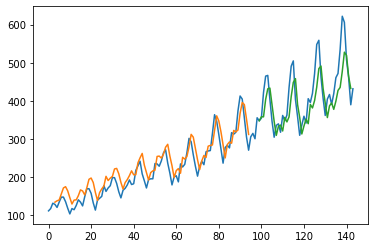

In [6]:
batch_size = 1
epochs = 100
look_back = 3
trainX, trainY, testX, testY, scaler, dataset = prepare_data(dataset, look_back)
model = create_model(n_neurons=4, n_additional_layers=0, batch_size=batch_size, look_back=look_back)
model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False)

evaluate_model(model, trainX, testX, trainY, testY, scaler, look_back)

44/44 [==============================] - 0s 2ms/step
Train Score: 21.94 RMSE
Test Score: 74.59 RMSE


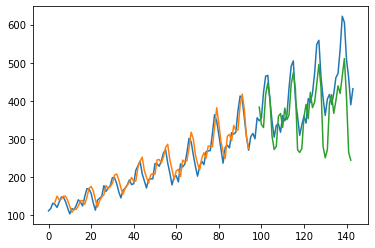

In [7]:
model = create_model(n_neurons=8, n_additional_layers=0, batch_size=batch_size, look_back=look_back)
model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False)

evaluate_model(model, trainX, testX, trainY, testY, scaler, look_back)

44/44 [==============================] - 0s 2ms/step
Train Score: 22.93 RMSE
Test Score: 116.74 RMSE


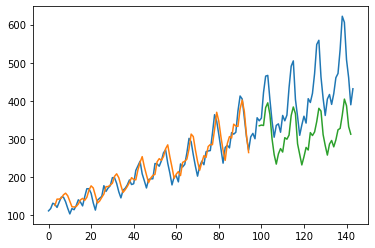

In [8]:
model = create_model(n_neurons=4, n_additional_layers=1, batch_size=batch_size, look_back=look_back)
model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False)

evaluate_model(model, trainX, testX, trainY, testY, scaler, look_back)

41/41 [==============================] - 0s 2ms/step
Train Score: 0.04 RMSE
Test Score: 0.16 RMSE


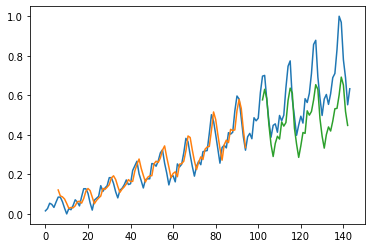

In [9]:
look_back = 6
trainX, trainY, testX, testY, scaler, dataset = prepare_data(dataset, look_back)
model = create_model(n_neurons=4, n_additional_layers=0, batch_size=batch_size, look_back=look_back)
model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0, shuffle=False)

evaluate_model(model, trainX, testX, trainY, testY, scaler, look_back)